\begin{align} \Huge  \textbf{TP 1} \end{align}

In [1]:
import pandas as pd
import math as m
import string as s
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from matplotlib import rc
from sklearn import linear_model, model_selection
from os import mkdir  

## 1. Récupérer les données

In [2]:
# Chargement des données
url = 'https://bitbucket.org/portierf/shared_files/downloads/Galton.txt'
df = pd.read_csv(url, sep='\t')

In [3]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


## 2. Créer une colonne supplémentaire appelée “MeanParents” qui contient la taille du parent "moyen".

In [4]:
df['MeanParents'] = 0.5 * (df['Father'] + 1.08 * df['Mother'])
df.head()

,Family,Father,Mother,Gender,Height,Kids,MeanParents
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66


## 3. Tracer le nuage de points

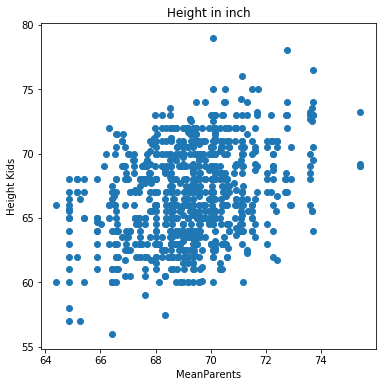

In [5]:
fig = plt.figure(figsize=(6,6))
plt.scatter(df['MeanParents'],df['Height'])
plt.xlabel('MeanParents')
plt.ylabel('Height Kids')
plt.title('Height in inch');

## 4. Estimer $\theta_0$, $\theta_1$, par $\hat{\theta_0}$, $\hat{\theta_1}$ en utilisant la fonction LinearRegression de sklearn.

In [6]:
x_train = df[['MeanParents']]
y_train = df['Height']
model_mean = linear_model.LinearRegression()
model_mean.fit(x_train, y_train)
theta0 = model_mean.intercept_
theta1 = model_mean.coef_[0]

$\hat{\theta_0}$ :

In [7]:
theta0

22.376205683004216

$\hat{\theta_1}$ :

In [8]:
theta1

0.6411903795908175

In [9]:
y_est = model_mean.predict(df[['MeanParents']])

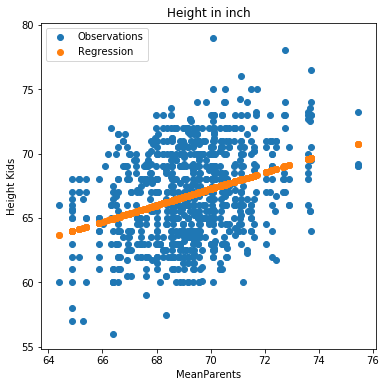

In [10]:
fig = plt.figure(figsize=(6,6))
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_est)
plt.xlabel('MeanParents')
plt.ylabel('Height Kids')
plt.title('Height in inch')
plt.legend(['Observations','Regression']);

## 5. Vérifier la formule vue en cours liée au recentrage des données.

In [11]:
x_center = x_train - np.mean(x_train)
y_center = y_train - np.mean(y_train)

In [12]:
model_center = linear_model.LinearRegression(fit_intercept = False)
model_center.fit(x_center, y_center)
theta_center = model_center.coef_[0]

In [13]:
theta_center

0.6411903795908168

Vérifions que $\hat{\theta_c} == \hat{\theta_1}$ :

In [14]:
print("Test sur l'égalité des theta : ", np.isclose(theta1, theta_center))

Test sur l'égalité des theta :  True


## 6. Visualiser l’histogramme des résidus

In [15]:
residus = y_train - y_est

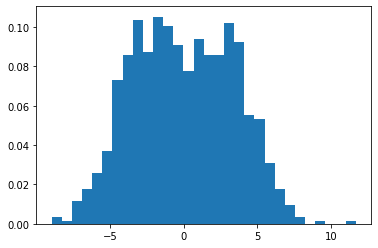

In [16]:
plt.hist(residus, density=True, bins=30);

L'histogramme des résidus est centré en 0. En revanche, si cela suivait parfaitement une loi normale centrée l'histogramme atteindrait un maximum en 0. Or, sur cette représentation, l'histogramme semble s'affesser en 0. Cela pourrait s'expliquer par l'addition de 2 gaussiennes (l'une dépendant des hommes et l'autre dépendant des femmes).

## 7. Tracer le nuage de points en distinguant le genre des parents.

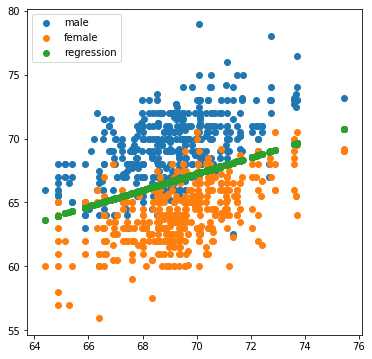

In [17]:
male = df['Gender'] == 'M'
female = df['Gender'] == 'F'
fig = plt.figure(figsize=(6,6))
plt.scatter(df['MeanParents'][male], y_train[male])
plt.scatter(df['MeanParents'][female], y_train[female])
plt.scatter(x_train,y_est)
plt.legend(['male','female','regression']);

On peut constater une séparation assez franche marquée par la régression entre les femmes et les hommes. Cela tendrait à prouver l'intuition précédente sur l'addition de 2 gaussiennes, une pour les hommes et l'autre pour les femmes.

## 8. Effectuer une régression sur le groupe des garçons uniquement.

In [18]:
x_train_male = df[['MeanParents']][male]
y_train_male = df['Height'][male]
model_male = linear_model.LinearRegression()
model_male.fit(x_train_male, y_train_male);

In [19]:
y_est_male = model_male.predict(df[['MeanParents']][male])

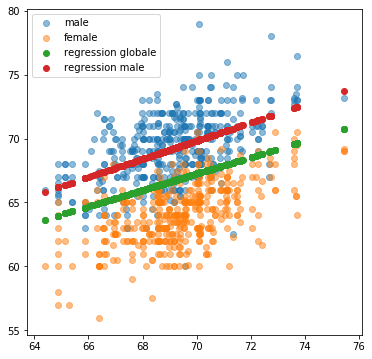

In [20]:
fig = plt.figure(figsize=(6,6))
plt.scatter(df['MeanParents'][male], y_train[male], alpha =0.5)
plt.scatter(df['MeanParents'][female], y_train[female], alpha =0.5)
plt.scatter(x_train,y_est)
plt.scatter(x_train_male, y_est_male)
plt.legend(['male','female','regression globale','regression male']);

### Représentation des résidus associés

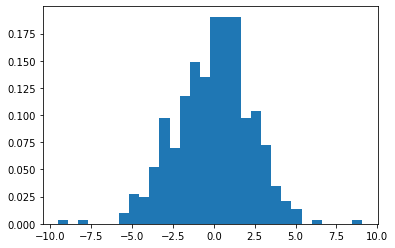

In [21]:
residus_male = y_train_male - y_est_male
plt.hist(residus_male, density=True, bins=30);

Dans ce cas, l'histogamme associé semble suivre une loi normale centrée.

## 9. Création de deux échantillons aléatoires : un de test et l'autre d'apprentissage.

In [22]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.2)

In [23]:
x_train2 = df_train[['MeanParents']]
y_train2 = df_train['Height']
global_model = linear_model.LinearRegression()
global_model.fit(x_train2, y_train2);

In [24]:
#Calcul du prédicteur du modèle global sur échantillon test
y_est_global = global_model.predict(df_test[['MeanParents']]);

In [25]:
male2 = df_train['Gender'] == 'M'
female2 = df_train['Gender'] == 'F'

x_train2_male = df_train[['MeanParents']][male2]
y_train2_male = df_train['Height'][male2]
male_model = linear_model.LinearRegression()
male_model.fit(x_train2_male, y_train2_male);

In [26]:
#Calcul du prédicteur du modèle homme sur échantillon test
male3 = df_test['Gender'] == 'M'
female3 = df_test['Gender'] == 'F'
y_est2_male = male_model.predict(df_test[['MeanParents']][male3]);

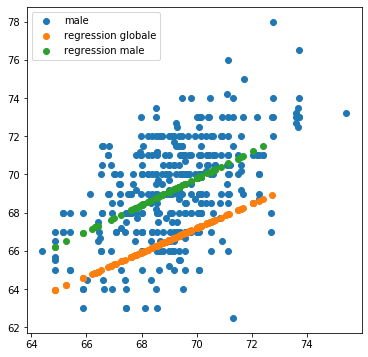

In [27]:
#Représentation graphique en 2D
fig = plt.figure(figsize=(6,6))
#plt.scatter(x_train2, y_train2, alpha = 0.5)
plt.scatter(x_train2_male, y_train2_male)
plt.scatter(df_test['MeanParents'],y_est_global)
plt.scatter(df_test['MeanParents'][male3], y_est2_male)
plt.legend(['male','regression globale','regression male']);

In [28]:
#Calcul du risque de prédiction sur le modèle global
risk_pred_global = (1/df_test[male3].shape[0]) * sum((df_test['Height'][male3]-y_est_global[male3])**2)

In [29]:
risk_pred_global

13.650894766774636

In [30]:
#Calcul du risque de prédiction sur le modèle 'hommes'
risk_pred_male = (1/df_test[male3].shape[0]) * sum((df_test['Height'][male3]-y_est2_male)**2)

In [31]:
risk_pred_male

6.504567052880869

## 10. En combinant les deux prédicteurs, celui appris sur les filles et celui appris sur les garçons, calculer le risque de prédiction associé.

In [32]:
#Construction du prédicteur appris sur les filles.
x_train2_female = df_train[['MeanParents']][female2]
y_train2_female = df_train['Height'][female2]
female_model = linear_model.LinearRegression()
female_model.fit(x_train2_female, y_train2_female);

In [33]:
y_est2_female = female_model.predict(df_test[['MeanParents']][female3]);

In [34]:
#Calcul du risque de prédiction sur le modèle combiné.
risk_pred_combined = (1/df_test.shape[0]) * (sum((df_test['Height'][male3]-y_est2_male)**2) + 
                                             sum((df_test['Height'][female3]-y_est2_female)**2))

In [35]:
risk_pred_combined

5.92861756723671

## 11. Calculer, "à la main", le coefficient de détermination à partir de $GENDER$

$$R^2 = \frac{\sum_{i=0}^{n}(\hat{y_i} - y_i)^2}{\sum_{i=0}^{n}(\overline{y_n} - y_i)^2} $$

In [36]:
#On remplace les valeurs M et F par 1 et 0
df.replace('F',0,inplace = True)
df.replace('M',1,inplace = True)

x_gender = df[['MeanParents','Gender']]
y_gender = df['Height']

gender_model = linear_model.LinearRegression()
gender_model.fit(x_gender, y_gender);

y_est_gender = gender_model.predict(df[['MeanParents','Gender']])

#Calcul du R2 affilié au modèle GENDER
sum_sq_residus_gender = np.sum((y_est_gender - y_gender)**2)
sum_sq_total_gender = np.sum((np.mean(y_gender) - y_gender)**2)

r2_gender = sum_sq_residus_gender / sum_sq_total_gender

#Calcul du R2 affilié au modèle MeanParents
r2_MeanParents = np.sum((y_est - y_train)**2) / np.sum((np.mean(y_train) - y_train)**2)

print ("Coefficient de détermination avec séparation filles / garçons = %.3f" % r2_gender)
print ("Coefficient de détermination avec MeanParents = %.3f" % r2_MeanParents)

Coefficient de détermination avec séparation filles / garçons = 0.363
Coefficient de détermination avec MeanParents = 0.894


## 12. Régression sur la taille des 2 parents.

Pour anticiper la question suivante, on travaillera ici sur le partitionnement aléatoire vu précédemment afin de pouvoir comparer les résultats.

In [37]:
x_train2D = df_train[['Father','Mother']]
y_train2D = df_train['Height']
global_model2D = linear_model.LinearRegression()
global_model2D.fit(x_train2D, y_train2D)
theta0_2D = global_model2D.intercept_
theta1_2D = global_model2D.coef_[0]
theta2_2D = global_model2D.coef_[1];

In [38]:
#Calcul du prédicteur associé au modèle
y_est_global_2D = global_model2D.predict(df_test[['Father','Mother']])

In [39]:
x_test2D = df_test[['Father','Mother']]
y_test2D = df_test['Height']

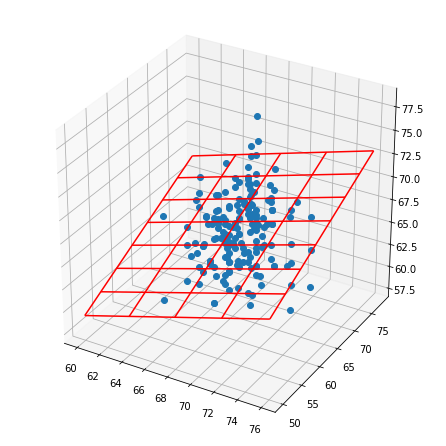

In [40]:
#Représentation graphique en 3D avec uniquement les données de l'échantillon test représentées en points bleus.
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
XX = np.arange(60, 80, 4)
YY = np.arange(50, 80, 4)
xx, yy = np.meshgrid(XX, YY)
zz = theta0_2D + theta1_2D*xx + theta2_2D*yy
ax.plot(df_test['Father'],df_test['Mother'],y_test2D,'o')
ax.plot_wireframe(xx, yy, zz, color = 'r');

## 13. A l’aide d’un échantillon test, comparer la performance des modèles.

In [45]:
risk_pred_male2D = 1/df_test[male3].shape[0] * sum((df_test['Height'][male3] - y_est_global_2D[male3])**2)

print("Prédiction des risques en fonction des modèles")
print("- modèle basé sur les hommes uniquement, 1 feature  = %.3f" % risk_pred_male)
print("- modèle basé sur le modèle global en 1D,  1 feature  = %.3f" % risk_pred_global)
print("- modèle basé sur le modèle global en 2D,  2 features = %.3f" % risk_pred_male2D)

Prédiction des risques en fonction des modèles
- modèle basé sur les hommes uniquement, 1 feature  = 6.505
- modèle basé sur le modèle global en 1D,  1 feature  = 13.651
- modèle basé sur le modèle global en 2D,  2 features = 13.632


Le modèle basé sur les 2 variables explicatives (Père et Mère) est très proche du modèle basé sur la moyenne pondérée des tailles des parents (MeanParents).
Le choix du modèle de la moyenne pondérée est pertinent.